# Plot TRAPPIST-1 Data

This notebook analyzes and plots the data where we have sampled the magma emplacement rate for each of the TRAPPIST-1 planets.

*Important*: to generate the data required to run this notebook, run the `generate_T1_data.ipynb` notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import string
from scipy.stats import gaussian_kde

In [ ]:
t1_dfs_05wt = np.load("sample_full_05wt.npy",allow_pickle=True)
t1_dfs_filtered_05wt = np.load("sample_filtered_05wt.npy",allow_pickle=True)

t1_dfs_1wt = np.load("sample_full_1wt.npy",allow_pickle=True)
t1_dfs_filtered_1wt = np.load("sample_filtered_1wt.npy",allow_pickle=True)

t1_dfs_3wt = np.load("sample_full_3wt.npy",allow_pickle=True)
t1_dfs_filtered_3wt = np.load("sample_filtered_3wt.npy",allow_pickle=True)

In [4]:
plt.rcParams['font.family'] = 'Gill Sans'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

col_dots = "#172713"
col_earth = "#009465"
col_mars = "#cb2f43"
col_io = "#59256a"

## Figure 3: TRAPPIST-1c correlation plot

In [ ]:
# Create the figure
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(15, 15)
ax = ax.flatten()

fig.suptitle("TRAPPIST-1 c parameter distributions and correlations with varying maximum mantle water content", fontsize=22, fontweight='bold', y=0.99)

t1c_df_05wt = t1_dfs_filtered_05wt[1]
t1c_df_1wt = t1_dfs_filtered_1wt[1]
t1c_df_3wt = t1_dfs_filtered_3wt[1]

plot_names = ["$Q$ (km$^3$ yr$^{-1}$) \n Magma emplacement rate",
              "$m^{mantle}_{H_2O}$ (wt%) \n Present mantle water content",
              "$F_{H_2O}$ (kg yr$^{-1}$) \n Water outgassing rate"]
lfs = 20

plt.rcParams['font.family'] = 'Gill Sans'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Function to create contour plot with specific data percentages
def create_contour_plot(ax, x, y, xlabel=None, ylabel=None, xlim=1, ylim=1, dashed=1):
    # Ensure data is numeric and remove NaNs
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
    x = x[mask]
    y = y[mask]
    
    # Perform kernel density estimation
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)
    z = kde(xy)
    
    # Sort the values of the density
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    
    # Calculate the cumulative distribution function (CDF)
    cdf = z.cumsum() / z.sum()
    
    # Determine the contour levels for 95% and 68% of the data
    levels = [z[np.searchsorted(cdf, 0.05)]]

    if dashed == 0:
        dash = "-"
    elif dashed == 1:
        dash = "--"
    else:
        dash = ":"

    # Create contour plot
    ax.tricontour(x, y, z, levels=levels, colors=['black'], linestyles=dash)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=lfs)

    if ylabel:
        ax.set_ylabel(ylabel, fontsize=lfs)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.minorticks_on()

# Function to create histogram plot
def create_histogram_plot(ax, data, xlabel=None, xlim=1, dashed=1, label=False):
    data = np.asarray(data, dtype=np.float64)
    data = data[~np.isnan(data) & ~np.isinf(data)]

    if dashed == 0:
        dash = "-"
    elif dashed == 1:
        dash = "--"
    else:
        dash = ":"

    ax.hist(data, bins=20, density=False, alpha=0.8, color='k', histtype='step', linewidth=2, linestyle=dash, label=label)
    #kde = gaussian_kde(data)
    #x = np.linspace(data.min(), data.max(), 1000)
    #ax.plot(x, kde(x), 'k')
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=lfs)
    ax.set_ylabel("Count", fontsize=lfs)
    ax.set_xlim(xlim)
    ax.minorticks_on()

# Plot 1: Q vs H2O_mantle
i = 3
var_x = np.log10(t1c_df_05wt["Q"].to_numpy().astype(float))
var_y = t1c_df_05wt["m_H2O_mantle"].to_numpy()*100
create_contour_plot(ax[i], var_x, var_y, None, "$m^{mantle}_{H_2O}$ (wt%) \n Present mantle water content", [-2, 4], [0, 3], dashed=0)

var_x = np.log10(t1c_df_1wt["Q"].to_numpy().astype(float))
var_y = t1c_df_1wt["m_H2O_mantle"].to_numpy()*100
create_contour_plot(ax[i], var_x, var_y, None, "$m^{mantle}_{H_2O}$ (wt%) \n Present mantle water content", [-2, 4], [0, 3], dashed=1)

var_x = np.log10(t1c_df_3wt["Q"].to_numpy().astype(float))
var_y = t1c_df_3wt["m_H2O_mantle"].to_numpy()*100
create_contour_plot(ax[i], var_x, var_y, None, "$m^{mantle}_{H_2O}$ (wt%) \n Present mantle water content", [-2, 4], [0, 3], dashed=2)

formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
ax[i].xaxis.set_major_formatter(formatter)

# Plot 2: Q vs H2O_flux
i = 6
var_x = np.log10(t1c_df_05wt["Q"].to_numpy().astype(float))
var_y = np.log10(t1c_df_05wt["H2O_flux"].to_numpy().astype(float))
create_contour_plot(ax[i], var_x, var_y, plot_names[0], plot_names[2], [-2, 4], [6, 14], dashed=0)

var_x = np.log10(t1c_df_1wt["Q"].to_numpy().astype(float))
var_y = np.log10(t1c_df_1wt["H2O_flux"].to_numpy().astype(float))
create_contour_plot(ax[i], var_x, var_y, plot_names[0], plot_names[2], [-2, 4], [6, 14], dashed=1)

var_x = np.log10(t1c_df_3wt["Q"].to_numpy().astype(float))
var_y = np.log10(t1c_df_3wt["H2O_flux"].to_numpy().astype(float))
create_contour_plot(ax[i], var_x, var_y, plot_names[0], plot_names[2], [-2, 4], [6, 14], dashed=2)

ax[i].xaxis.set_major_formatter(formatter)
ax[i].yaxis.set_major_formatter(formatter)

# Plot 3: m_H2O_mantle vs H2O_flux
i = 7
var_x = t1c_df_05wt["m_H2O_mantle"].to_numpy()*100
var_y = np.log10(t1c_df_05wt["H2O_flux"].to_numpy().astype(float))
create_contour_plot(ax[i], var_x, var_y, plot_names[1], None, [0, 3], [6, 14], dashed=0)

var_x = t1c_df_1wt["m_H2O_mantle"].to_numpy()*100
var_y = np.log10(t1c_df_1wt["H2O_flux"].to_numpy().astype(float))
create_contour_plot(ax[i], var_x, var_y, plot_names[1], None, [0, 3], [6, 14], dashed=1)

var_x = t1c_df_3wt["m_H2O_mantle"].to_numpy()*100
var_y = np.log10(t1c_df_3wt["H2O_flux"].to_numpy().astype(float))
create_contour_plot(ax[i], var_x, var_y, plot_names[1], None, [0, 3], [6, 14], dashed=2)

ax[i].yaxis.set_major_formatter(formatter)

# Diagonal plots: Posterior distributions
i = 0
var_x = np.log10(t1c_df_05wt["Q"].to_numpy().astype(float))
create_histogram_plot(ax[i], var_x, None, [-2, 4], dashed=0, label = "Max. mantle water content = 0.5 wt%")

var_x = np.log10(t1c_df_1wt["Q"].to_numpy().astype(float))
create_histogram_plot(ax[i], var_x, None, [-2, 4], dashed=1, label = "Max. mantle water content = 1 wt%")

var_x = np.log10(t1c_df_3wt["Q"].to_numpy().astype(float))
create_histogram_plot(ax[i], var_x, None, [-2, 4], dashed=2, label = "Max. mantle water content = 3 wt%")

formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
ax[i].xaxis.set_major_formatter(formatter)
ax[i].set_ylim([0,6000])

i = 4
var_x = t1c_df_05wt["m_H2O_mantle"].to_numpy()*100
create_histogram_plot(ax[i], var_x, None, [0, 3], dashed=0)

var_x = t1c_df_1wt["m_H2O_mantle"].to_numpy()*100
create_histogram_plot(ax[i], var_x, None, [0, 3], dashed=1)

var_x = t1c_df_3wt["m_H2O_mantle"].to_numpy()*100
create_histogram_plot(ax[i], var_x, None, [0, 3], dashed=2)

ax[i].set_ylim([0,5000])

i = 8
var_x = np.log10(t1c_df_05wt["H2O_flux"].to_numpy().astype(float))
create_histogram_plot(ax[i], var_x, plot_names[2], [6, 14], dashed=0)

var_x = np.log10(t1c_df_1wt["H2O_flux"].to_numpy().astype(float))
create_histogram_plot(ax[i], var_x, plot_names[2], [6, 14], dashed=1)

var_x = np.log10(t1c_df_3wt["H2O_flux"].to_numpy().astype(float))
create_histogram_plot(ax[i], var_x, plot_names[2], [6, 14], dashed=2)

formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
ax[i].xaxis.set_major_formatter(formatter)
ax[i].set_ylim([0,10000])

# Turn off top right corner plots
handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[1].legend(handles, labels, ncol=1, labelspacing=0.5, fontsize=20, loc='lower left')
for i in [1, 2, 5]:
    ax[i].axis("off")

label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    if i in [1,2,5]:  # Skip the axis that was turned off
        continue
    label = string.ascii_lowercase[label_index]
    axi.text(0.96, 0.94, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=22, fontweight='bold')
    label_index += 1  # Increment only for visible axes

fig.align_xlabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.12, wspace=0.28)
plt.show()

## Figure 4 and some bonus statistics

In [6]:
# CALCULATE ENERGY LIMITED HYDROGEN ESCAPE RATE

# T1 planet values
r_earth = 6371*1e3 # m
rp = np.array([1.116, 1.097, 0.788, 0.920, 1.045, 1.129, 0.755])*r_earth # m

M_earth = 5.9722e24 # kg
Mp = np.array([1.374, 1.308, 0.388, 0.692, 1.039, 1.321, 0.326])*M_earth # kg

Fxuv = np.array([2935.13,1564.87,788.455,456.452,263.598,178.116,102.035])*1e-7 # joules s-1 cm-2

# Constants in the equation
epsilon = 0.3 # unitless
G = 6.674e-11 # N m2 kg-2
Ktide = 1 # unitless
mH = 1*1.67377e-27 # kg
sa = 4*np.pi*np.power(rp,2)

# Final equation
phi_cgs = (epsilon*Fxuv*rp)/(4*G*Mp*mH) # H atoms s-1 cm-2
phi_final = phi_cgs*(1.67377e-27)*(3.1536e7)*(sa*1e4) # kg yr-1, H2_FLUX is not allowed to be higher than this

T-1 c median Q:  0.6931715021944309
T-1 c mean   Q:  37.31523956020651
Percent higher than Earth:  12.343467647338553
Percent higher than Io:  1.7896205180230162
Percent lower than 1kmyr:  54.20854072218876
T-1 c median mantle water:  1.2124745405594939
T-1 c mean   mantle water:  1.2959263413998185
Max water outgassing:  37.17827027575969
Max water outgassing:  35.72339392018553
Max water outgassing:  10.385799285103628
Max water outgassing:  18.43642494799643
Max water outgassing:  28.057918306255914
Max water outgassing:  35.69259147761564
Max water outgassing:  8.889702769502268
Percent CO2 rate higher than 1e12:  2.073360174999207


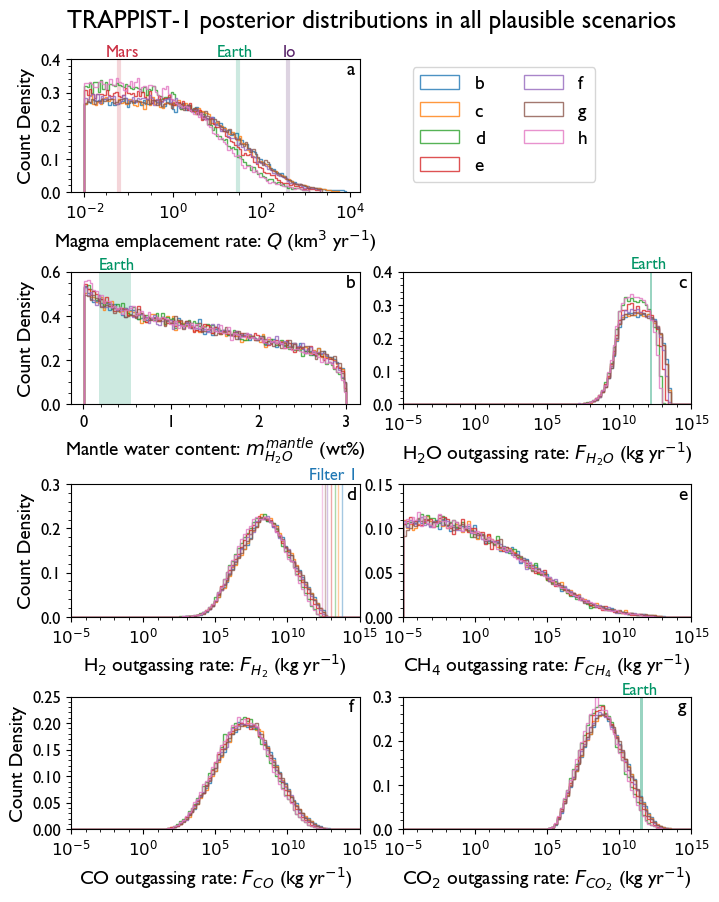

In [ ]:
# Create the figure
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(8,10)
ax = ax.flatten()

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig.suptitle("TRAPPIST-1 posterior distributions in all plausible scenarios", fontsize=18, fontweight='bold', y=0.93)

max_Qs = [8500, 5840, 1230, 2159, 2130, 2344, 1230]
planet_labels = ['b','c','d','e','f','g','h']
var_names = ["Q","skip","m_H2O_mantle","H2O_flux","H2_flux","CH4_flux","CO_flux","CO2_flux"]
plot_names = ["Magma emplacement rate: $Q$ (km$^3$ yr$^{-1}$)",
              "skip",
              "Mantle water content: $m^{mantle}_{H_2O}$ (wt%)",
              "H$_2$O outgassing rate: $F_{H_2O}$ (kg yr$^{-1}$)",
              "H$_2$ outgassing rate: $F_{H_2}$ (kg yr$^{-1}$)",
              "CH$_4$ outgassing rate: $F_{CH_4}$ (kg yr$^{-1}$)",
              "CO outgassing rate: $F_{CO}$ (kg yr$^{-1}$)",
              "CO$_2$ outgassing rate: $F_{CO_2}$ (kg yr$^{-1}$)"]

lw = 1
al = 0.8
dent = True
binnum = 100

l_fs = 14
ss_fs = 12

for i in range(len(var_names)):
    
    var_name = var_names[i]
    if var_name =="skip":
        continue
    
    plot_name = plot_names[i]
    #ax[i].grid()
    ax[i].minorticks_on()
    ax[i].set_xlabel(plot_name,fontsize = l_fs)
    
    # loop through the planets
    for j in range(7):
        df = t1_dfs_filtered_1wt[j]
        var = df[var_name].to_numpy()
        
        match var_name:
            case "m_H2O_mantle":
                ax[i].hist(var*100,label=planet_labels[j],bins=np.linspace(0.01,3,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 1:
                    print("T-1 c median mantle water: ",np.median(var)*100)
                    print("T-1 c mean   mantle water: ",np.mean(var)*100)
                
                if j == 0:
                    x_start = 0.18
                    x_end = 0.54
                    ax[i].axvspan(x_start, x_end, facecolor=col_earth, alpha=0.2, edgecolor='none')
                    ax[i].text(x_start, 0.613, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].set_ylim((0,0.6))
                    ax[i].set_yticks((0,0.2,0.4,0.6))
                
            case "Q":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],
                           bins=np.linspace(np.log10(0.01),np.log10(max_Qs[j]),binnum),density=dent, alpha = al,histtype='step',linewidth=lw)

                if j == 1:
                    print("T-1 c median Q: ",np.median(var))
                    print("T-1 c mean   Q: ",np.mean(var))
                    
                    higher_than_earth = var > 30
                    higher_than_io = var > 413
                    lower_than_1kmyr = var < 1
                    
                    print("Percent higher than Earth: ",100*sum(higher_than_earth)/len(var))
                    print("Percent higher than Io: ",100*sum(higher_than_io)/len(var))
                    print("Percent lower than 1kmyr: ",100*sum(lower_than_1kmyr)/len(var))
                
                
                if j == 0:
                    t_height = 0.41
                    ax[i].text(np.log10(30-20), t_height, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].text(np.log10(0.06 - 0.03), t_height, 'Mars', color=col_mars, fontsize=ss_fs)
                    ax[i].text(np.log10(413 - 110), t_height, 'Io', color=col_io, fontsize=ss_fs)

                    ax[i].axvline(np.log10(30), color=col_earth, linestyle='-',linewidth=3, alpha=0.2)
                    ax[i].axvline(np.log10(0.06), color=col_mars, linestyle='-',linewidth=3, alpha=0.2)
                    ax[i].axvline(np.log10(413), color=col_io, linestyle='-',linewidth=3, alpha=0.2)
                    
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    
                    ax[i].set_ylim((0,0.4))
                    ax[i].set_yticks((0,0.1,0.2,0.3,0.4))
            
            case "H2O_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                print("Max water outgassing: ",np.max(var)*1e-12)
                
                # if j == 1:
                #     print("T-1 c median water outgassing: ",np.median(var)*1e-11)
                #     print("T-1 c mean   water outgassing: ",np.mean(var)*1e-11)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # H2O fluxes - Catling book
                    x_start = 1.35e12
                    x_end = 2.07e12
                    ax[i].axvspan(np.log10(x_start), np.log10(x_end), facecolor=col_earth, alpha=0.4,edgecolor='none')
                    ax[i].text(np.log10(x_start*0.05), 0.41, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    
                    ax[i].set_ylim((0,0.4))
                    ax[i].set_yticks((0,0.1,0.2,0.3,0.4))
            
            case "H2_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
            
            case "CH4_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # H2O fluxes - Catling book
                    # x_start = 1.35e12
                    # x_end = 2.07e12
                    # ax[i].axvspan(np.log10(x_start), np.log10(x_end), color='g', alpha=0.2)
                    # ax[i].text(np.log10(x_start*0.4), 0.361, 'Earth', color='g', fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    
                    ax[i].set_ylim((0,0.15))
                    ax[i].set_yticks((0,0.05,0.1,0.15))
            
            case "CO_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # H2O fluxes - Catling book
                    # x_start = 1.35e12
                    # x_end = 2.07e12
                    # ax[i].axvspan(np.log10(x_start), np.log10(x_end), color='g', alpha=0.2)
                    # ax[i].text(np.log10(x_start*0.4), 0.361, 'Earth', color='g', fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    ax[i].set_ylim((0,0.25))
                    ax[i].set_yticks((0,0.05,0.1,0.15,0.2,0.25))
                    
            case "CO2_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 1:
                    
                    higher_1e12 = var > 1e12
                    
                    print("Percent CO2 rate higher than 1e12: ",100*sum(higher_1e12)/len(var))


                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # CO2 fluxes - Catling book
                    x_start = 6.5e12*44*1e-3
                    x_end = 10.5e12*44*1e-3
                    ax[i].axvspan(np.log10(x_start), np.log10(x_end), facecolor=col_earth, alpha=0.4, edgecolor='none')
                    ax[i].text(np.log10(x_start*0.05), 0.305, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))

    #ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax[i].ticklabel_format(axis='y', style='sci', scilimits=(100, 1000))
    

ax[0].set_ylabel("Count Density",fontsize = l_fs)
ax[2].set_ylabel("Count Density",fontsize = l_fs)
ax[4].set_ylabel("Count Density",fontsize = l_fs)
ax[6].set_ylabel("Count Density",fontsize = l_fs)
handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[1].legend(handles, labels, ncol=2, columnspacing=2 , labelspacing=0.5, fontsize=l_fs, loc='lower left')
ax[1].axis("off")

lw2 = 1
ls = '-'
al2 = 0.4
ymn = 0
ymx = 1
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#7f7f7f', '#bcbd22', '#17becf']
ax[4].axvline(np.log10(phi_final[0]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[0],alpha=al2)
ax[4].axvline(np.log10(phi_final[1]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[1],alpha=al2)
ax[4].axvline(np.log10(phi_final[2]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[2],alpha=al2)
ax[4].axvline(np.log10(phi_final[3]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[3],alpha=al2)
ax[4].axvline(np.log10(phi_final[4]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[4],alpha=al2)
ax[4].axvline(np.log10(phi_final[5]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[5],alpha=al2)
ax[4].axvline(np.log10(phi_final[6]),ymin = ymn,ymax = ymx,linewidth=lw2,linestyle=ls,color=c[6],alpha=al2)

t_height = 0.31
ax[4].text(np.log10(0.3e12), t_height, 'Filter 1', color=c[0], fontsize=ss_fs)


label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    if i == 1:  # Skip the axis that was turned off
        continue
    label = string.ascii_lowercase[label_index]
    axi.text(0.97, 0.92, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=14, fontweight='bold')
    label_index += 1  # Increment only for visible axes


plt.subplots_adjust(hspace=0.6, wspace = 0.15)
plt.show()

## Appendix Figure A1

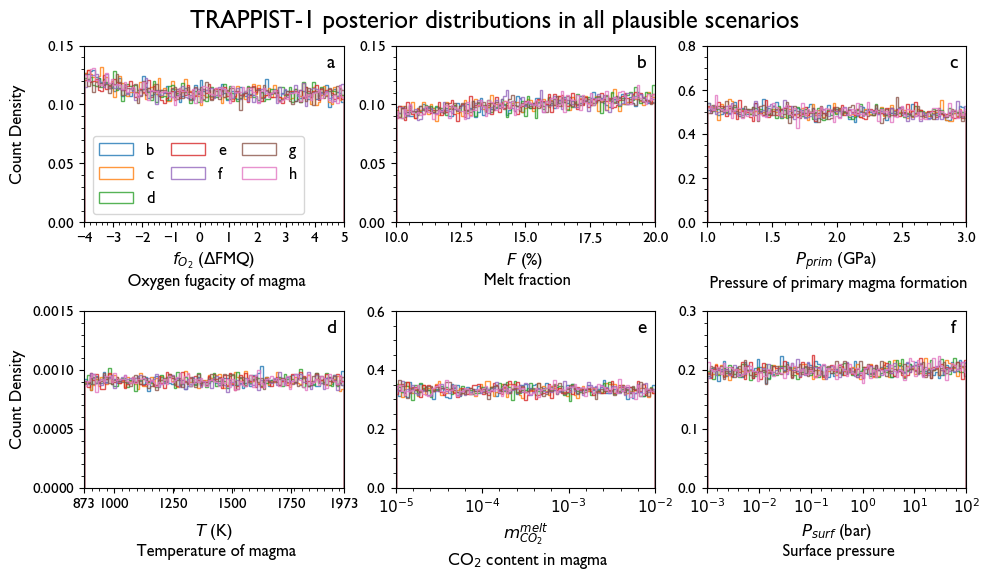

In [ ]:
# Create the figure
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10,6)
ax = ax.flatten()

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig.suptitle("TRAPPIST-1 posterior distributions in all plausible scenarios", fontsize=18, fontweight='bold', y=0.96)

max_Qs = [8500, 5840, 1230, 2159, 2130, 2344, 1230]
planet_labels = ['b','c','d','e','f','g','h']
var_names = ["FMQ","F","Pprim","T","x_CO2_melt","Psurf"]
plot_names = ["$f_{O_2}$ ($\Delta$FMQ) \n Oxygen fugacity of magma",
              "$F$ (%) \n Melt fraction",
              "$P_{prim}$ (GPa) \n Pressure of primary magma formation",
              "$T$ (K) \n Temperature of magma",
              "$m^{melt}_{CO_2}$ \n CO$_2$ content in magma",
              "$P_{surf}$ (bar) \n Surface pressure"]

lw = 1
al = 0.8
dent = True
binnum = 100

l_fs = 12
ss_fs = 12

for i in range(len(var_names)):
    
    var_name = var_names[i]
    if var_name =="skip":
        continue
    
    plot_name = plot_names[i]
    #ax[i].grid()
    ax[i].minorticks_on()
    ax[i].set_xlabel(plot_name,fontsize = l_fs)
    
    # loop through the planets
    for j in range(7):
        df = t1_dfs_filtered_1wt[j]
        var = df[var_name].to_numpy()
        
        match var_name:
            case "F":
                ax[i].hist(var*100,label=planet_labels[j],bins=np.linspace(10,20,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                ax[i].set_xlim((10,20))
                ax[i].set_xticks(np.linspace(10,20,5))
                ax[i].set_ylim((0,0.15))
                ax[i].set_yticks((0,0.05,0.1,0.15))
            case "Pprim":
                ax[i].hist(var,label=planet_labels[j],bins=np.linspace(1,3,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                ax[i].set_xlim((1,3))
                ax[i].set_xticks(np.linspace(1,3,5))
                ax[i].set_ylim((0,0.8))
                ax[i].set_yticks((0,0.2,0.4,0.6,0.8))
            case "T":
                ax[i].hist(var,label=planet_labels[j],bins=np.linspace(873,1973,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                ax[i].set_xlim((873,1973))
                ax[i].set_xticks((873,1000,1250,1500,1750,1973))
                ax[i].set_ylim((0,0.0015))
                ax[i].set_yticks((0,0.0005,0.001,0.0015))
            case "x_CO2_melt":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],bins=np.linspace(-5,-2,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                ax[i].xaxis.set_major_formatter(formatter)
                ax[i].set_xlim((-5,-2))
                ax[i].set_xticks(np.linspace(-5,-2,4))
                ax[i].set_ylim((0,0.6))
                ax[i].set_yticks((0,0.2,0.4,0.6))
            case "FMQ":
                ax[i].hist(var,label=planet_labels[j],bins=np.linspace(-4,5,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                ax[i].set_xlim((-4,5))
                ax[i].set_xticks(np.linspace(-4,5,10))
                ax[i].set_ylim((0,0.15))
                ax[i].set_yticks((0,0.05,0.1,0.15))
            case "Psurf":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],bins=np.linspace(-3,2,binnum),density=dent, alpha = al,histtype='step',linewidth=lw)
                formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                ax[i].xaxis.set_major_formatter(formatter)
                ax[i].set_xlim((-3,2))
                ax[i].set_xticks(np.linspace(-3,2,6))
                ax[i].set_ylim((0,0.3))
                ax[i].set_yticks((0,0.1,0.2,0.3))

    ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax[i].ticklabel_format(axis='y', style='sci', scilimits=(100, 1000))
    

ax[0].set_ylabel("Count Density",fontsize = l_fs)
ax[3].set_ylabel("Count Density",fontsize = l_fs)
# handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[0].legend(ncol=3, columnspacing=1 , labelspacing=0.5, fontsize=l_fs, loc='lower left')
# ax[3].axis("off")

label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    label = string.ascii_lowercase[label_index]
    axi.text(0.95, 0.9, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=14, fontweight='bold')
    label_index += 1  # Increment only for visible axes


fig.align_ylabels()
fig.align_xlabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace = 0.2)
plt.show()

## Appendix Figure B1

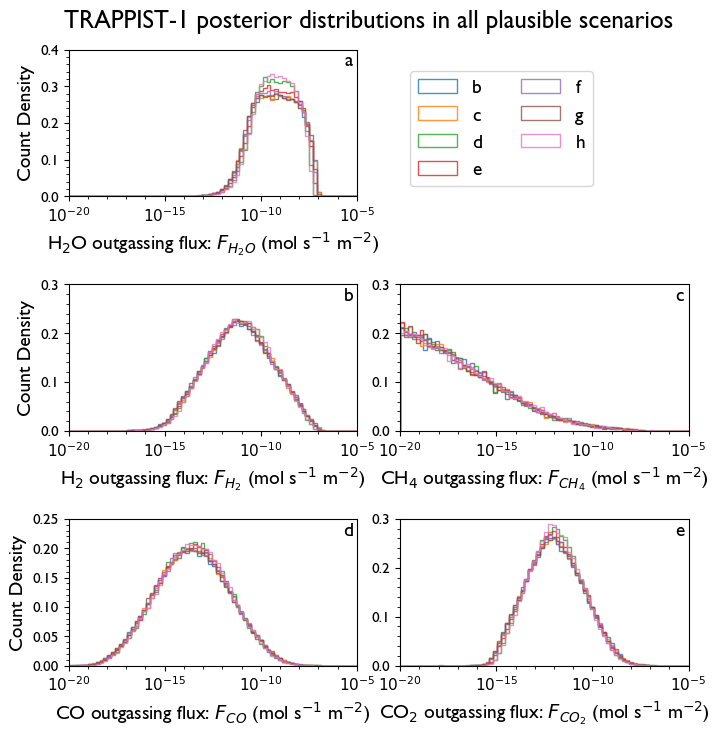

In [ ]:
# Create the figure
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(8,8)
ax = ax.flatten()

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig.suptitle("TRAPPIST-1 posterior distributions in all plausible scenarios", fontsize=18, fontweight='bold', y=0.93)

max_Qs = [8500, 5840, 1230, 2159, 2130, 2344, 1230]

# T1 planet values
r_earth = 6371*1e3 # m
rp = np.array([1.116, 1.097, 0.788, 0.920, 1.045, 1.129, 0.755])*r_earth # m

molar_keys = ['H2O','H2','CO2','CO','CH4']
molar_vals = np.array([18.015,2.016,44.01,28.01,16.04]) # g/mol
molar_masses = dict(zip(molar_keys, molar_vals))

cf = 2.53e-6 # conversion factor

planet_labels = ['b','c','d','e','f','g','h']
var_names = ["H2O_flux","skip","H2_flux","CH4_flux","CO_flux","CO2_flux"]
plot_names = ["H$_2$O outgassing flux: $F_{H_2O}$ (mol s$^{-1}$ m$^{-2}$)",
              "skip",
              "H$_2$ outgassing flux: $F_{H_2}$ (mol s$^{-1}$ m$^{-2}$)",
              "CH$_4$ outgassing flux: $F_{CH_4}$ (mol s$^{-1}$ m$^{-2}$)",
              "CO outgassing flux: $F_{CO}$ (mol s$^{-1}$ m$^{-2}$)",
              "CO$_2$ outgassing flux: $F_{CO_2}$ (mol s$^{-1}$ m$^{-2}$)"]

lw = 1
al = 0.8
dent = True
binnum = 100

l_fs = 14
ss_fs = 12

for i in range(len(var_names)):
    
    var_name = var_names[i]
    if var_name =="skip":
        continue
    
    plot_name = plot_names[i]
    #ax[i].grid()
    ax[i].minorticks_on()
    ax[i].set_xlabel(plot_name,fontsize = l_fs)
    
    # loop through the planets
    for j in range(7):
        df = t1_dfs_filtered_1wt[j]
        var = df[var_name].to_numpy()
        r = rp[j]
        
        match var_name:            
            case "H2O_flux":
                
                var_conv = var*cf*(1/molar_masses["H2O"])*(1/r**2)
                
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    
                    ax[i].set_ylim((0,0.4))
                    ax[i].set_yticks((0,0.1,0.2,0.3,0.4))
            
            case "H2_flux":
                
                var_conv = var*cf*(1/molar_masses["H2"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
            
            case "CH4_flux":
                var_conv = var*cf*(1/molar_masses["CH4"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
            
            case "CO_flux":
                var_conv = var*cf*(1/molar_masses["CO"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    ax[i].set_ylim((0,0.25))
                    ax[i].set_yticks((0,0.05,0.1,0.15,0.2,0.25))
                    
            case "CO2_flux":
                var_conv = var*cf*(1/molar_masses["CO2"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))

    #ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax[i].ticklabel_format(axis='y', style='sci', scilimits=(100, 1000))
    

ax[0].set_ylabel("Count Density",fontsize = l_fs)
ax[2].set_ylabel("Count Density",fontsize = l_fs)
ax[4].set_ylabel("Count Density",fontsize = l_fs)
handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[1].legend(handles, labels, ncol=2, columnspacing=2 , labelspacing=0.5, fontsize=l_fs, loc='lower left')
ax[1].axis("off")

label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    if i == 1:  # Skip the axis that was turned off
        continue
    label = string.ascii_lowercase[label_index]
    axi.text(0.97, 0.92, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=14, fontweight='bold')
    label_index += 1  # Increment only for visible axes


plt.subplots_adjust(hspace=0.6, wspace = 0.15)
plt.show()